In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.inspection import permutation_importance
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import json
import joblib
import os


In [22]:
df = pd.read_csv('S06-hw-dataset-01.csv')
print(f"Размер датасета: {df.shape}")
print("\nПервые 5 строк:")
print(df.head())
print("\nИнформация о датасете:")
print(df.info())
print("\nБазовые статистики:")
print(df.describe())

Размер датасета: (12000, 30)

Первые 5 строк:
   id     num01     num02     num03     num04     num05     num06     num07  \
0   1 -0.946058 -0.070313  1.824445 -2.754422  0.808865 -0.111094 -0.268950   
1   2 -2.484027  0.739378  1.596908 -2.586479 -0.033225 -3.054412 -4.706908   
2   3  1.522629  7.159635 -0.564903 -4.493110  1.623610  5.450187 -0.974595   
3   4  0.463373 -1.073908  1.752813  0.362786  2.790872  4.082385  0.322283   
4   5  3.188390 -4.701692 -0.689918 -0.448995  0.373821 -3.275363 -1.760931   

      num08     num09  ...     num20     num21     num22     num23     num24  \
0 -3.078210  0.801275  ... -1.616515 -1.989464  1.407390 -0.218362  2.016052   
1 -9.795169  0.145911  ... -1.727040 -0.583997  1.136761  0.285978 -0.310879   
2 -5.189589  1.600591  ...  0.524408  2.022430  1.278358 -0.850547  0.847457   
3  3.390984 -0.033929  ...  2.399834 -1.431576 -0.746987  0.049639  2.414689   
4  0.923689  0.537345  ... -2.183407 -2.896590  2.440343 -1.097168  1.457323   

In [23]:
print("Распределение таргета:")
print(df['target'].value_counts(normalize=True))
print(f"Классы: {sorted(df['target'].unique())}")

# Проверка пропусков
print(f"\nПропуски в данных:\n{df.isnull().sum()}")

# Типы столбцов
print(f"\nТипы столбцов:\n{df.dtypes}")

Распределение таргета:
target
0    0.676583
1    0.323417
Name: proportion, dtype: float64
Классы: [np.int64(0), np.int64(1)]

Пропуски в данных:
id               0
num01            0
num02            0
num03            0
num04            0
num05            0
num06            0
num07            0
num08            0
num09            0
num10            0
num11            0
num12            0
num13            0
num14            0
num15            0
num16            0
num17            0
num18            0
num19            0
num20            0
num21            0
num22            0
num23            0
num24            0
cat_contract     0
cat_region       0
cat_payment      0
tenure_months    0
target           0
dtype: int64

Типы столбцов:
id                 int64
num01            float64
num02            float64
num03            float64
num04            float64
num05            float64
num06            float64
num07            float64
num08            float64
num09            float64
num10

In [24]:

X = df.drop(columns=['target', 'id'])
y = df['target']

print(f"Размер X: {X.shape}")
print(f"Размер y: {y.shape}")
print(f"Названия признаков: {list(X.columns)}")

Размер X: (12000, 28)
Размер y: (12000,)
Названия признаков: ['num01', 'num02', 'num03', 'num04', 'num05', 'num06', 'num07', 'num08', 'num09', 'num10', 'num11', 'num12', 'num13', 'num14', 'num15', 'num16', 'num17', 'num18', 'num19', 'num20', 'num21', 'num22', 'num23', 'num24', 'cat_contract', 'cat_region', 'cat_payment', 'tenure_months']


In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=22, stratify=y
)

print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")
print(f"Распределение классов в train: {y_train.value_counts(normalize=True)}")
print(f"Распределение классов в test: {y_test.value_counts(normalize=True)}")

# Объясняем важность фиксированного seed и стратификации
print("\nФиксированный random_state обеспечивает воспроизводимость результатов.")
print("Stratify=y гарантирует, что пропорции классов сохраняются в train и test.")

Размер обучающей выборки: (9600, 28)
Размер тестовой выборки: (2400, 28)
Распределение классов в train: target
0    0.676562
1    0.323437
Name: proportion, dtype: float64
Распределение классов в test: target
0    0.676667
1    0.323333
Name: proportion, dtype: float64

Фиксированный random_state обеспечивает воспроизводимость результатов.
Stratify=y гарантирует, что пропорции классов сохраняются в train и test.


In [26]:
dummy_clf = DummyClassifier(strategy='most_frequent', random_state=22)
dummy_clf.fit(X_train, y_train)
y_pred_dummy = dummy_clf.predict(X_test)

dummy_accuracy = accuracy_score(y_test, y_pred_dummy)
dummy_f1 = f1_score(y_test, y_pred_dummy)

print(f"Baseline (DummyClassifier): Accuracy = {dummy_accuracy:.4f}, F1 = {dummy_f1:.4f}")

Baseline (DummyClassifier): Accuracy = 0.6767, F1 = 0.0000


In [27]:
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression(random_state=22, max_iter=1000))
])

lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)
y_proba_lr = lr_pipeline.predict_proba(X_test)[:, 1]

lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr)
lr_auc = roc_auc_score(y_test, y_proba_lr)

print(f"Logistic Regression: Accuracy = {lr_accuracy:.4f}, F1 = {lr_f1:.4f}, AUC = {lr_auc:.4f}")

Logistic Regression: Accuracy = 0.8350, F1 = 0.7215, AUC = 0.8865


In [30]:
dt_params = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_leaf': [5, 10, 20]
}

dt_grid = GridSearchCV(
    DecisionTreeClassifier(random_state=22),
    dt_params,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

dt_grid.fit(X_train, y_train)
best_dt = dt_grid.best_estimator_

print(f"Лучшие параметры для Decision Tree: {dt_grid.best_params_}")
print(f"Лучший CV-скор: {dt_grid.best_score_:.4f}")

y_pred_dt = best_dt.predict(X_test)
y_proba_dt = best_dt.predict_proba(X_test)[:, 1]

dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt)
dt_auc = roc_auc_score(y_test, y_proba_dt)

print(f"Decision Tree: Accuracy = {dt_accuracy:.4f}, F1 = {dt_f1:.4f}, AUC = {dt_auc:.4f}")

Лучшие параметры для Decision Tree: {'max_depth': 10, 'min_samples_leaf': 20}
Лучший CV-скор: 0.9092
Decision Tree: Accuracy = 0.8838, F1 = 0.8134, AUC = 0.9199


In [31]:
rf_params = {
    'n_estimators': [100],
    'max_depth': [5, 10, None],
    'min_samples_leaf': [5, 10],
    'max_features': ['sqrt', 'log2']
}

rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=22),
    rf_params,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_

print(f"Лучшие параметры для Random Forest: {rf_grid.best_params_}")
print(f"Лучший CV-скор: {rf_grid.best_score_:.4f}")

y_pred_rf = best_rf.predict(X_test)
y_proba_rf = best_rf.predict_proba(X_test)[:, 1]

rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)
rf_auc = roc_auc_score(y_test, y_proba_rf)

print(f"Random Forest: Accuracy = {rf_accuracy:.4f}, F1 = {rf_f1:.4f}, AUC = {rf_auc:.4f}")

Лучшие параметры для Random Forest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'n_estimators': 100}
Лучший CV-скор: 0.9647
Random Forest: Accuracy = 0.9354, F1 = 0.8941, AUC = 0.9729


In [32]:
gb_params = {
    'n_estimators': [100],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

gb_grid = GridSearchCV(
    GradientBoostingClassifier(random_state=22),
    gb_params,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

gb_grid.fit(X_train, y_train)
best_gb = gb_grid.best_estimator_

print(f"Лучшие параметры для Gradient Boosting: {gb_grid.best_params_}")
print(f"Лучший CV-скор: {gb_grid.best_score_:.4f}")

y_pred_gb = best_gb.predict(X_test)
y_proba_gb = best_gb.predict_proba(X_test)[:, 1]

gb_accuracy = accuracy_score(y_test, y_pred_gb)
gb_f1 = f1_score(y_test, y_pred_gb)
gb_auc = roc_auc_score(y_test, y_proba_gb)

print(f"Gradient Boosting: Accuracy = {gb_accuracy:.4f}, F1 = {gb_f1:.4f}, AUC = {gb_auc:.4f}")

Лучшие параметры для Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100}
Лучший CV-скор: 0.9714
Gradient Boosting: Accuracy = 0.9450, F1 = 0.9113, AUC = 0.9759


In [33]:
base_models = [
    ('dt', DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=22)),
    ('lr', Pipeline([('scaler', StandardScaler()),
                     ('log_reg', LogisticRegression(max_iter=1000, random_state=22))]))
]

stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(),
    cv=5,  # Кросс-валидация для получения прогнозов базовых моделей
    n_jobs=-1
)

stacking_clf.fit(X_train, y_train)
y_pred_stack = stacking_clf.predict(X_test)
y_proba_stack = stacking_clf.predict_proba(X_test)[:, 1]

stack_accuracy = accuracy_score(y_test, y_pred_stack)
stack_f1 = f1_score(y_test, y_pred_stack)
stack_auc = roc_auc_score(y_test, y_proba_stack)

print(f"Stacking: Accuracy = {stack_accuracy:.4f}, F1 = {stack_f1:.4f}, AUC = {stack_auc:.4f}")

Stacking: Accuracy = 0.8629, F1 = 0.7704, AUC = 0.9143


In [34]:
results = pd.DataFrame({
    'Model': ['Dummy', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'Stacking'],
    'Accuracy': [dummy_accuracy, lr_accuracy, dt_accuracy, rf_accuracy, gb_accuracy, stack_accuracy],
    'F1': [dummy_f1, lr_f1, dt_f1, rf_f1, gb_f1, stack_f1],
    'AUC': [0, lr_auc, dt_auc, rf_auc, gb_auc, stack_auc]  # У dummy нет AUC
})

print("Сравнение моделей:")
print(results)

# Находим лучшую модель по AUC
best_model_idx = results['AUC'][1:].idxmax() # Исключаем dummy из поиска
best_model_name = results.loc[best_model_idx, 'Model']
best_model_auc = results.loc[best_model_idx, 'AUC']

print(f"\nЛучшая модель по AUC: {best_model_name} (AUC = {best_model_auc:.4f})")

Сравнение моделей:
                 Model  Accuracy        F1       AUC
0                Dummy  0.676667  0.000000  0.000000
1  Logistic Regression  0.835000  0.721519  0.886483
2        Decision Tree  0.883750  0.813378  0.919940
3        Random Forest  0.935417  0.894053  0.972918
4    Gradient Boosting  0.945000  0.911290  0.975864
5             Stacking  0.862917  0.770412  0.914308

Лучшая модель по AUC: Gradient Boosting (AUC = 0.9759)


In [35]:
if best_model_name == 'Logistic Regression':
    best_model = lr_pipeline
elif best_model_name == 'Decision Tree':
    best_model = best_dt
elif best_model_name == 'Random Forest':
    best_model = best_rf
elif best_model_name == 'Gradient Boosting':
    best_model = best_gb
elif best_model_name == 'Stacking':
    best_model = stacking_clf

# Перестраиваем модель на полной обучающей выборке
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)
y_proba_best = best_model.predict_proba(X_test)[:, 1]

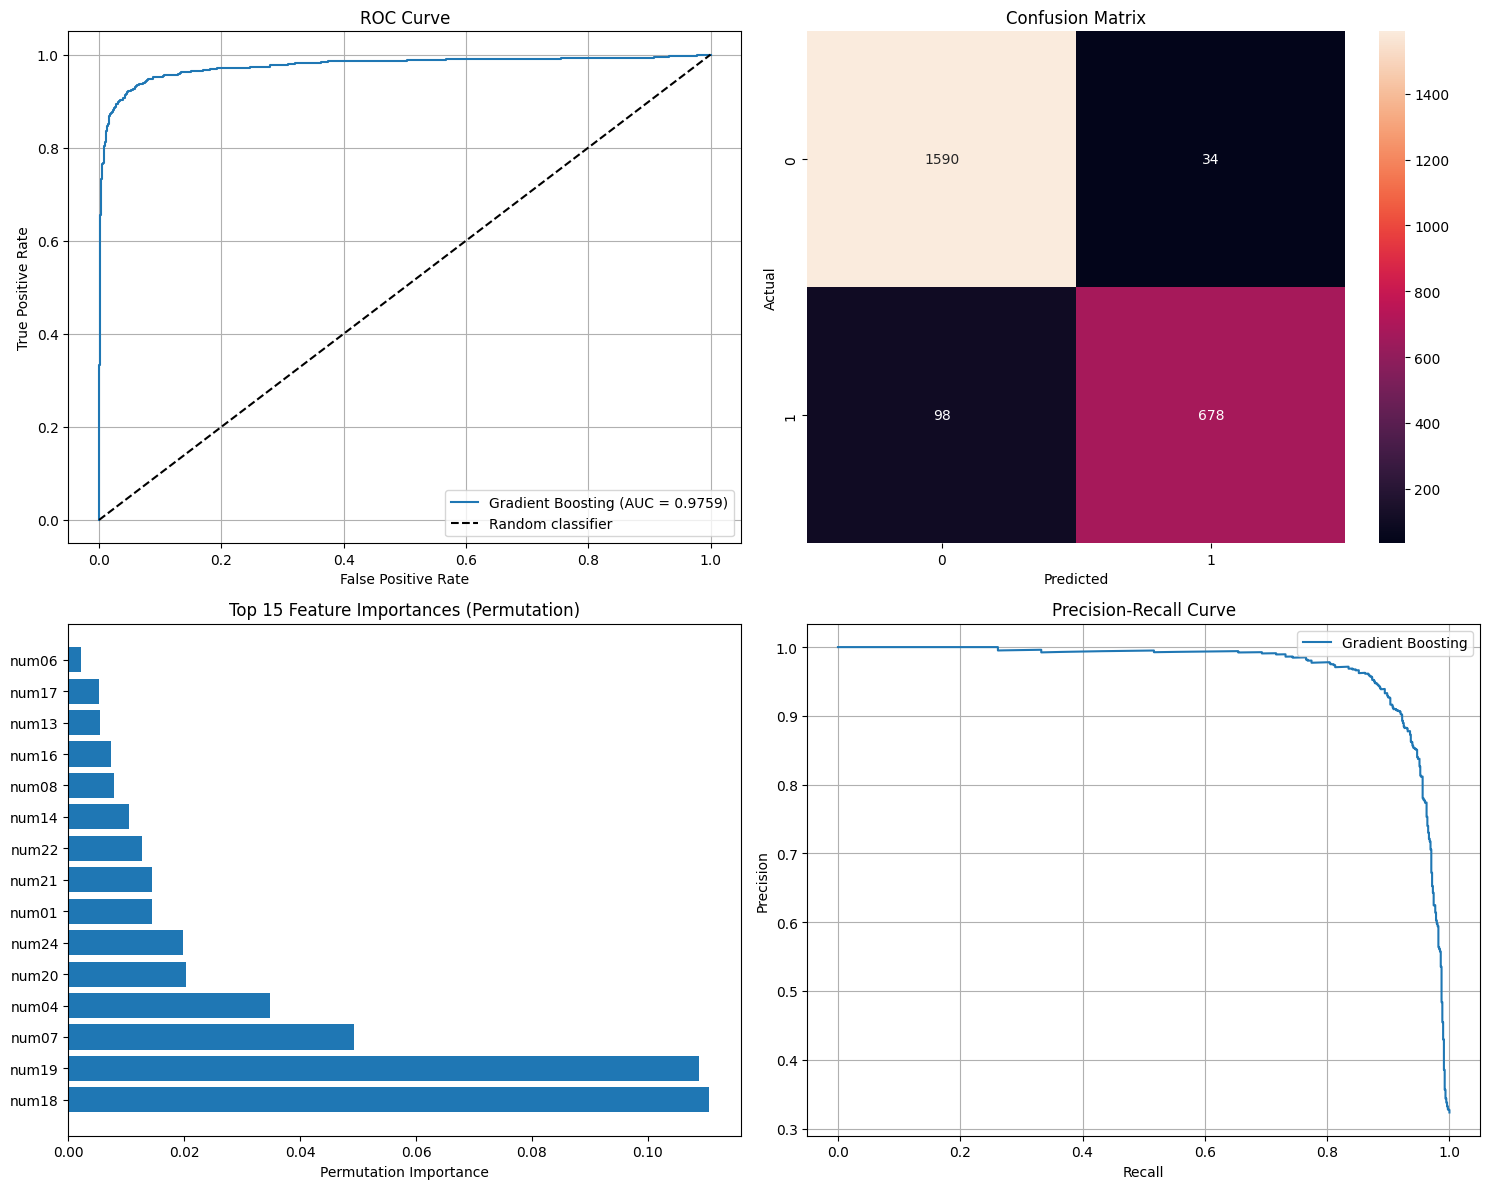

In [42]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# ROC-кривая
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, y_proba_best)
axes[0, 0].plot(fpr, tpr, label=f'{best_model_name} (AUC = {best_model_auc:.4f})')
axes[0, 0].plot([0, 1], [0, 1], 'k--', label='Random classifier')
axes[0, 0].set_xlabel('False Positive Rate')
axes[0, 0].set_ylabel('True Positive Rate')
axes[0, 0].set_title('ROC Curve')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', ax=axes[0, 1])
axes[0, 1].set_title('Confusion Matrix')
axes[0, 1].set_xlabel('Predicted')
axes[0, 1].set_ylabel('Actual')

# Feature Importance (permutation importance)
perm_importance = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=22)
sorted_idx = perm_importance.importances_mean.argsort()[::-1][:15]  # Top 15 признаков

axes[1, 0].barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx])
axes[1, 0].set_yticks(range(len(sorted_idx)))
axes[1, 0].set_yticklabels([X.columns[i] for i in sorted_idx])
axes[1, 0].set_xlabel('Permutation Importance')
axes[1, 0].set_title('Top 15 Feature Importances (Permutation)')

# Оставляем четвертый график пустым или добавляем PR-кривую, если данные с дисбалансом
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_test, y_proba_best)
axes[1, 1].plot(recall, precision, label=f'{best_model_name}')
axes[1, 1].set_xlabel('Recall')
axes[1, 1].set_ylabel('Precision')
axes[1, 1].set_title('Precision-Recall Curve')
axes[1, 1].legend()
axes[1, 1].grid(True)

plt.tight_layout()
plt.savefig('artifacts/figures/model_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

In [38]:
perm_importance = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=22)
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance_mean': perm_importance.importances_mean,
    'importance_std': perm_importance.importances_std
}).sort_values(by='importance_mean', ascending=False)

print("Топ-15 наиболее важных признаков (permutation importance):")
print(importance_df.head(15))

Топ-15 наиболее важных признаков (permutation importance):
   feature  importance_mean  importance_std
17   num18         0.110583        0.003556
18   num19         0.108917        0.004079
6    num07         0.049250        0.004479
3    num04         0.034833        0.003102
19   num20         0.020292        0.001223
23   num24         0.019708        0.002157
0    num01         0.014500        0.002587
20   num21         0.014417        0.001947
21   num22         0.012708        0.001648
13   num14         0.010500        0.001862
7    num08         0.007833        0.001601
15   num16         0.007417        0.002123
12   num13         0.005458        0.001170
16   num17         0.005292        0.001901
5    num06         0.002125        0.001564


In [39]:
os.makedirs('artifacts', exist_ok=True)
os.makedirs('artifacts/figures', exist_ok=True)

# 1. metrics_test.json
test_metrics = {
    'dummy': {'accuracy': dummy_accuracy, 'f1': dummy_f1},
    'logistic_regression': {'accuracy': lr_accuracy, 'f1': lr_f1, 'auc': lr_auc},
    'decision_tree': {'accuracy': dt_accuracy, 'f1': dt_f1, 'auc': dt_auc},
    'random_forest': {'accuracy': rf_accuracy, 'f1': rf_f1, 'auc': rf_auc},
    'gradient_boosting': {'accuracy': gb_accuracy, 'f1': gb_f1, 'auc': gb_auc},
    'stacking': {'accuracy': stack_accuracy, 'f1': stack_f1, 'auc': stack_auc}
}

with open('artifacts/metrics_test.json', 'w') as f:
    json.dump(test_metrics, f, indent=2)

# 2. search_summaries.json
search_summaries = {
    'decision_tree': {
        'best_params': dt_grid.best_params_,
        'cv_score': float(dt_grid.best_score_)
    },
    'random_forest': {
        'best_params': rf_grid.best_params_,
        'cv_score': float(rf_grid.best_score_)
    },
    'gradient_boosting': {
        'best_params': gb_grid.best_params_,
        'cv_score': float(gb_grid.best_score_)
    }
}

with open('artifacts/search_summaries.json', 'w') as f:
    json.dump(search_summaries, f, indent=2)

# 3. best_model.joblib
joblib.dump(best_model, 'artifacts/best_model.joblib')

# 4. best_model_meta.json
best_model_meta = {
    'model_name': best_model_name,
    'model_params': str(best_model.get_params()) if hasattr(best_model, 'get_params') else 'N/A',
    'test_metrics': {
        'accuracy': float(results.loc[results['Model'] == best_model_name, 'Accuracy'].values[0]),
        'f1': float(results.loc[results['Model'] == best_model_name, 'F1'].values[0]),
        'auc': float(results.loc[results['Model'] == best_model_name, 'AUC'].values[0])
    }
}

with open('artifacts/best_model_meta.json', 'w') as f:
    json.dump(best_model_meta, f, indent=2)

print("Артефакты сохранены в папку artifacts/")

Артефакты сохранены в папку artifacts/


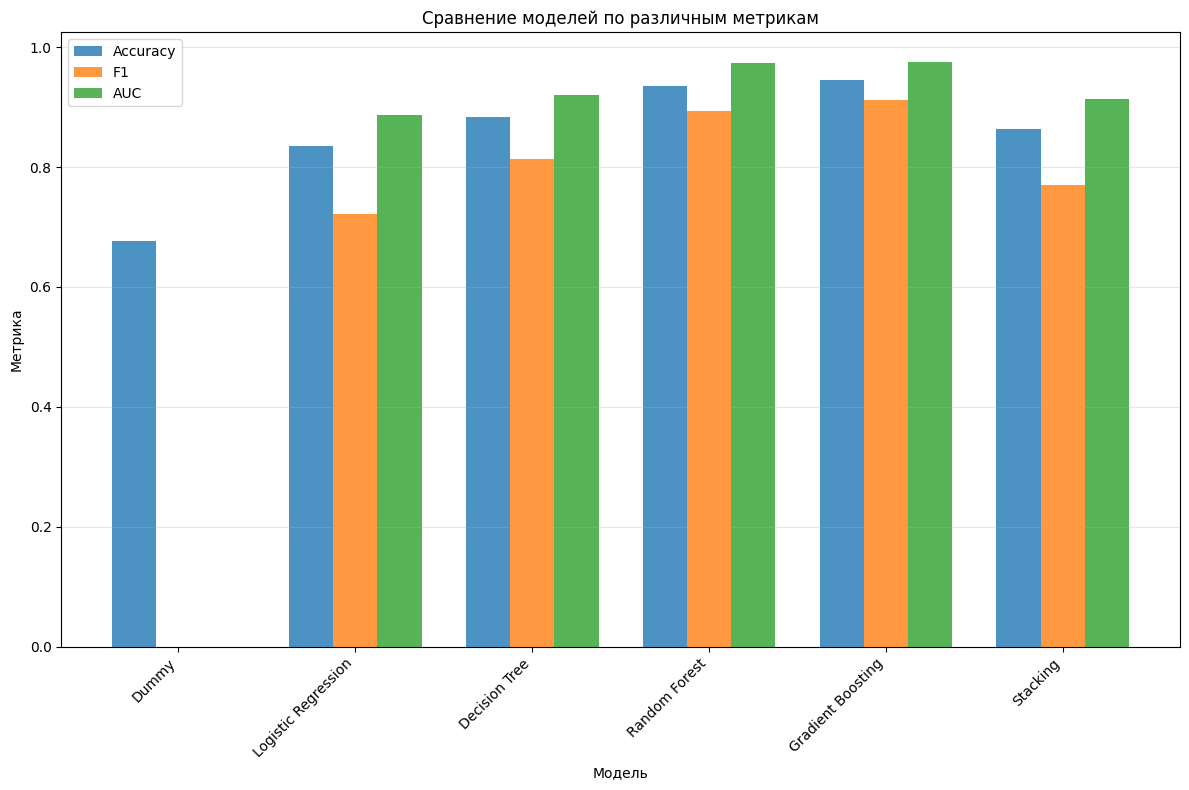

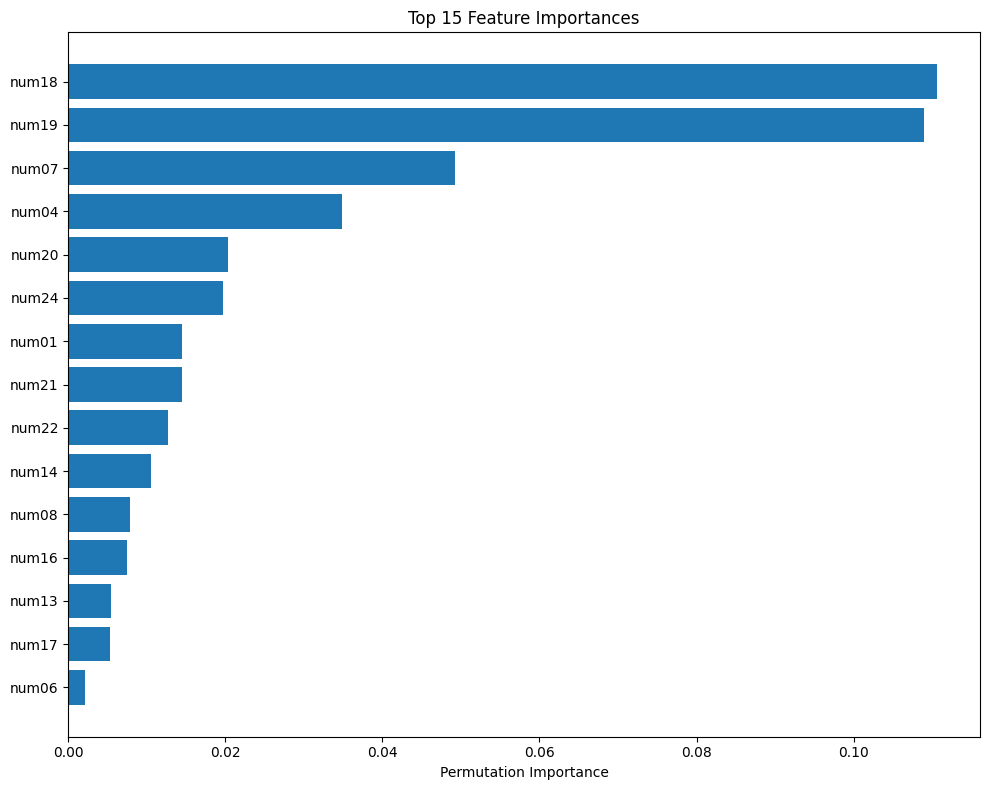

In [40]:
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(len(results))
width = 0.25

ax.bar(x - width, results['Accuracy'], width, label='Accuracy', alpha=0.8)
ax.bar(x, results['F1'], width, label='F1', alpha=0.8)
ax.bar(x + width, results['AUC'], width, label='AUC', alpha=0.8)

ax.set_xlabel('Модель')
ax.set_ylabel('Метрика')
ax.set_title('Сравнение моделей по различным метрикам')
ax.set_xticks(x)
ax.set_xticklabels(results['Model'], rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('artifacts/figures/model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# График важности признаков
top_features = importance_df.head(15)
plt.figure(figsize=(10, 8))
plt.barh(range(len(top_features)), top_features['importance_mean'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Permutation Importance')
plt.title('Top 15 Feature Importances')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('artifacts/figures/feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

In [41]:
print("=== ФИНАЛЬНЫЙ ВЫВОД ===")
print(f"Лучшая модель: {best_model_name}")
print(f"Accuracy: {results.loc[results['Model'] == best_model_name, 'Accuracy'].values[0]:.4f}")
print(f"F1: {results.loc[results['Model'] == best_model_name, 'F1'].values[0]:.4f}")
print(f"AUC: {results.loc[results['Model'] == best_model_name, 'AUC'].values[0]:.4f}")
print(f"\nНаиболее важные признаки:")
for idx, row in importance_df.head(5).iterrows():
    print(f"- {row['feature']}: {row['importance_mean']:.4f}")

=== ФИНАЛЬНЫЙ ВЫВОД ===
Лучшая модель: Gradient Boosting
Accuracy: 0.9450
F1: 0.9113
AUC: 0.9759

Наиболее важные признаки:
- num18: 0.1106
- num19: 0.1089
- num07: 0.0492
- num04: 0.0348
- num20: 0.0203
